Ajuste de la arquitectura del MLP para MNIST visto en la sesión anterior

In [1]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
import keras_tuner
keras.utils.set_random_seed(23)

In [3]:
(x_train_val, y_train_val), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
input_dim = 784
x_train_val = x_train_val.reshape(-1, input_dim).astype("float32") / 255.0
x_test = x_test.reshape(-1, input_dim).astype("float32") / 255.0
num_classes = 10
y_train_val = keras.utils.to_categorical(y_train_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train_val[:-10000]; x_val = x_train_val[-10000:]
y_train = y_train_val[:-10000]; y_val = y_train_val[-10000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def build_model(hp):
  M = keras.Sequential()
  M.add(keras.Input(shape=(784,)))
  for L in range(hp.Int("num_layers", 1, 3)):
      M.add(keras.layers.Dense(
            units=hp.Int(f"units_{L}", min_value=700, max_value=900, step=100),
            activation='relu'))
  M.add(keras.layers.Dense(10, activation='softmax'))
  M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return M


In [8]:
tuner = keras_tuner.BayesianOptimization(
  hypermodel=build_model, # función para construir un modelo
  objective="val_accuracy", # objetivo a optimizar
  max_trials=10, # máximo número de experimentos (trials) a realizar
  executions_per_trial=1, # modelos a crear, entrenar y evaluar por cada trial
  overwrite=True, # para reinicializar o continuar una búsqueda previa
  directory="/tmp", # directorio para guardar los resultados del ajuste
  project_name="MNIST", # subdirectorio dentro de directory
)


In [9]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 700, 'max_value': 900, 'step': 100, 'sampling': 'linear'}


In [10]:
tuner.search(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

Trial 10 Complete [00h 02m 38s]
val_accuracy: 0.881600022315979

Best val_accuracy So Far: 0.8873000144958496
Total elapsed time: 00h 29m 25s


In [11]:
tuner.results_summary(num_trials=1)

Results summary
Results in /tmp/MNIST
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
num_layers: 3
units_0: 800
units_1: 700
units_2: 700
Score: 0.8873000144958496


In [12]:
best = tuner.get_best_models(num_models=1)[0]
score = best.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loss: 0.4571
Precisión: 88.2%


In [14]:
M = build_model(tuner.get_best_hyperparameters(1)[0])
H = M.fit(x_train_val, y_train_val, batch_size=16, epochs=20, verbose=0)

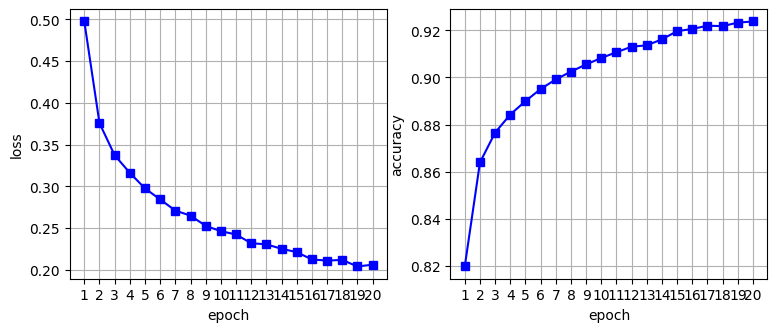

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.set_xticks(xx); ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.plot(xx, H.history['accuracy'], color='b', marker='s');

In [16]:
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.5184
Precisión: 87.4%


Ejercicio: realiza un experimento similar al de MNIST con Fashion-MNIST


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
import keras_tuner
keras.utils.set_random_seed(23)

In [18]:
(x_train_val, y_train_val), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
input_dim = 784
x_train_val = x_train_val.reshape(-1, input_dim).astype("float32") / 255.0
x_test = x_test.reshape(-1, input_dim).astype("float32") / 255.0
num_classes = 10
y_train_val = keras.utils.to_categorical(y_train_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train_val[:-10000]; x_val = x_train_val[-10000:]
y_train = y_train_val[:-10000]; y_val = y_train_val[-10000:]

In [19]:
def build_model(hp):
  M = keras.Sequential()
  M.add(keras.Input(shape=(784,)))
  for L in range(hp.Int("num_layers", 1, 3)):
      M.add(keras.layers.Dense(
            units=hp.Int(f"units_{L}", min_value=700, max_value=900, step=100),
            activation='relu'))
  M.add(keras.layers.Dense(10, activation='softmax'))
  M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return M

In [20]:
tuner = keras_tuner.BayesianOptimization(
  hypermodel=build_model, # función para construir un modelo
  objective="val_accuracy", # objetivo a optimizar
  max_trials=5, # máximo número de experimentos (trials) a realizar
  executions_per_trial=1, # modelos a crear, entrenar y evaluar por cada trial
  overwrite=True, # para reinicializar o continuar una búsqueda previa
  directory="/tmp", # directorio para guardar los resultados del ajuste
  project_name="Fashion-MNIST", # subdirectorio dentro de directory
)

In [21]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 700, 'max_value': 900, 'step': 100, 'sampling': 'linear'}


In [22]:
tuner.search(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

Trial 5 Complete [00h 02m 32s]
val_accuracy: 0.8848999738693237

Best val_accuracy So Far: 0.8848999738693237
Total elapsed time: 00h 14m 14s


In [23]:
tuner.results_summary(num_trials=1)

Results summary
Results in /tmp/Fashion-MNIST
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 1
units_0: 900
units_1: 800
units_2: 900
Score: 0.8848999738693237


In [24]:
best = tuner.get_best_models(num_models=1)[0]
score = best.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Loss: 0.4518
Precisión: 87.9%


In [28]:
M = build_model(tuner.get_best_hyperparameters(1)[0])
H = M.fit(x_train_val, y_train_val, batch_size=16, epochs=20, verbose=0)

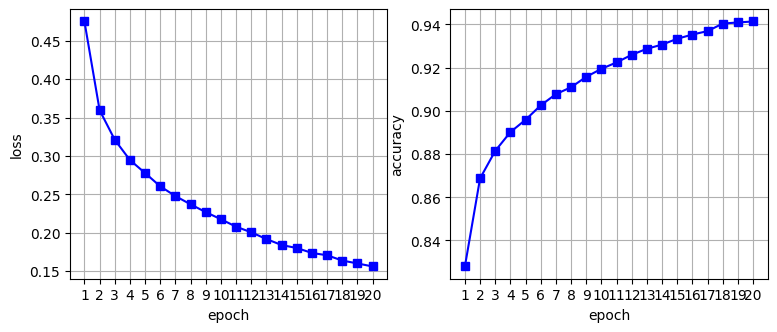

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.set_xticks(xx); ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.plot(xx, H.history['accuracy'], color='b', marker='s');

In [30]:
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.595
Precisión: 85.0%
